# Group6 0129 Assignment

### Haijing ZHU, Huajuan ZHOU, Ting ZHU, You SHAN, Zhen XING

### **Exercise 1**

#### Part1

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [49]:
data = []
for l in open("/Users/zhuhaijing/desktop/matrix_data.txt"):
    row = [float(x) for x in l.split()]
    if len(row) > 0:
        data.append(row)

In [50]:
X=np.mat(data)
a,b=np.linalg.eig(X)
radius=np.max(abs(a))
print("The spectral raduis is",radius)

The spectral raduis is 1.00442776945


#### Part2 

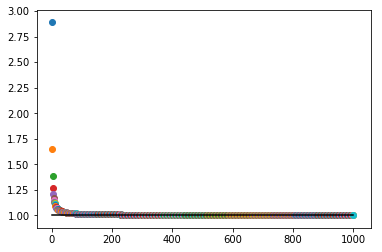

The slowest run took 5.65 times longer than the fastest. This could mean that an intermediate result is being cached.
5.25 µs ± 4.26 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
The spectral raduis is 1.00442776945
The left hand side value is 1.00562889992


In [51]:
v=np.mat([1,1,1,1,1,1,1,1,1,1])
v=v.T
t=1000
def f(i):
    z=1/i
    lhs=(np.linalg.norm((X**(i))*v))**(z)
    return lhs
for i in range(1,t+1):
    plt.scatter(i,f(i))
plt.plot(np.ones((t,1))*radius,'k')
%timeit plt.show()
print("The spectral raduis is",radius)
print("The left hand side value is",f(t))

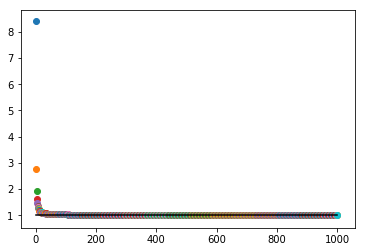

Radius is 1.00442776945
The left value is [ 1.01076398]


In [52]:
#Version2 for Problem1
import numpy as np
from scipy import linalg
import scipy 
import math
import matplotlib.pyplot as plt

def readFile(path):
    f = open(path)
    first_ele = True
    for data in f.readlines():
        data = data.strip('\n')
        nums = data.split(" ")
        if first_ele:
            nums = [float(x) for x in nums ]
            matrix = np.array(nums)
            first_ele = False
        else:
            nums = [float(x) for x in nums]
            matrix = np.c_[matrix,nums]
    f.close()
    return matrix

data=readFile("/Users/zhuhaijing/desktop/matrix_data.txt")
w,vl=scipy.linalg.eig(data)

def mol(complex):
    real=complex.real
    imag=complex.imag
    return max((real**2+imag**2)**0.5)

radius=mol(w)
nums,cols=data.shape
v=np.ones((nums,1))

def prove(iter,radius):
    for i in range(1,iter+1):
        x_i=data
        for j in range(i-1):
            x_i=x_i@data
        x_i=x_i@v
        x1=sum(x_i**2)**(1/i)
        plt.scatter(i,x1)
    plt.plot(np.ones((iter,1))*radius,'k')
    plt.show()
    return x1

x1=prove(1000,radius)
str1='Radius is'
str2='The left value is'
print(str1,radius)
print(str2,x1)

### Exercise 2

In [53]:
#Version1
def plot(g,x0,ts_length, k):
    x = np.empty(ts_length)
    x[0] = x0
    for t in range(ts_length-1):
        x[t+1] = g(x[t])
    plt.hist(x, k, normed=1, histtype='stepfilled', edgecolor='black', facecolor='blue', alpha=0.75) 
    plt.show()

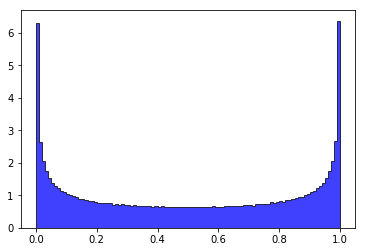

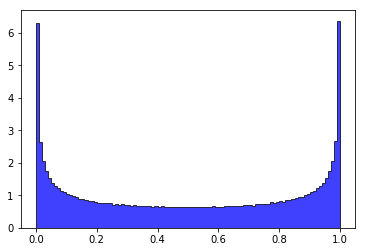

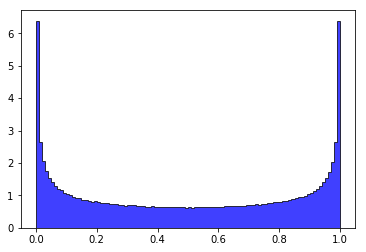

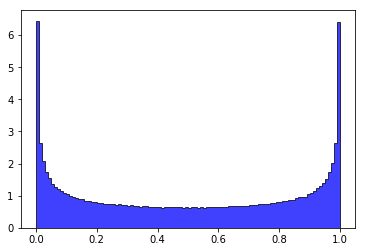

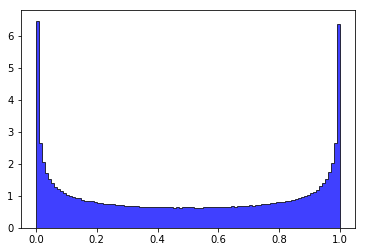

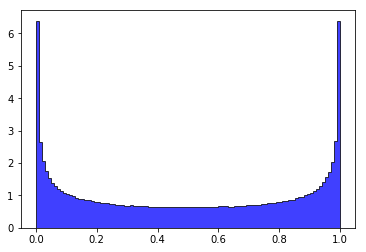

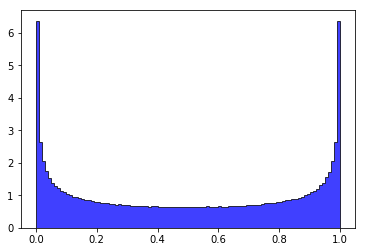

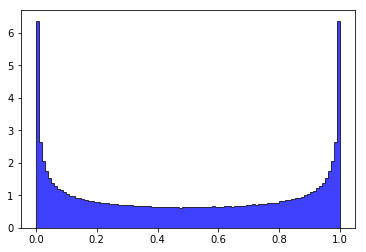

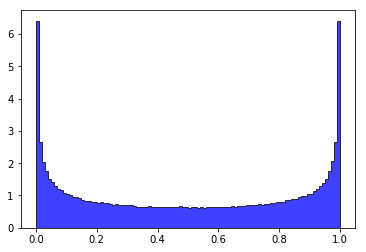

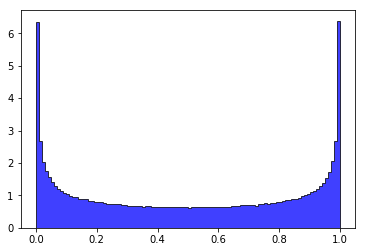

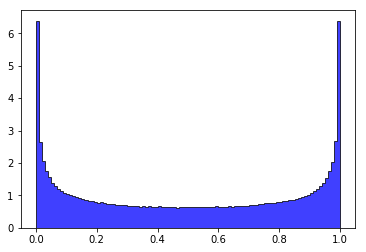

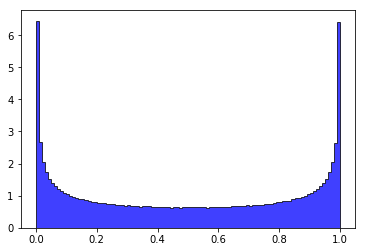

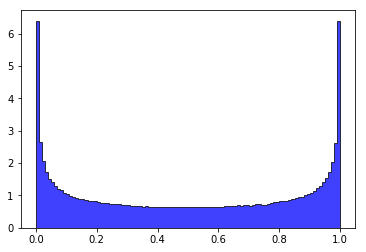

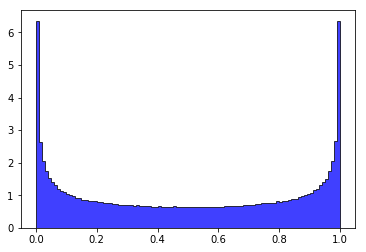

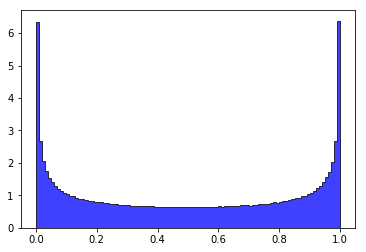

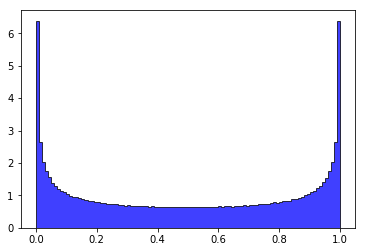

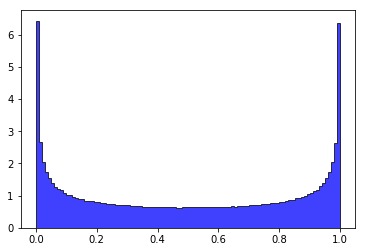

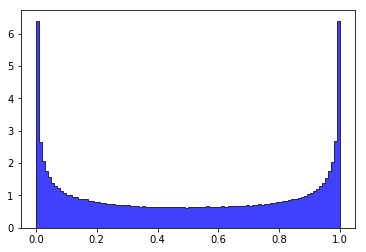

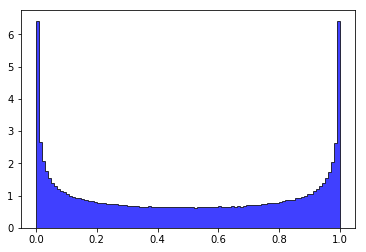

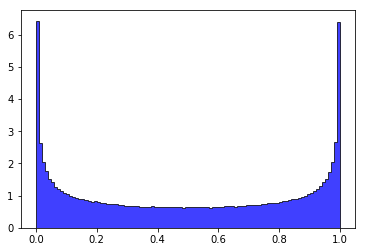

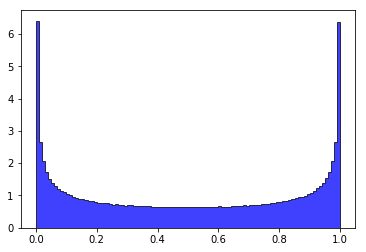

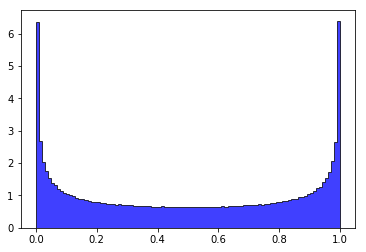

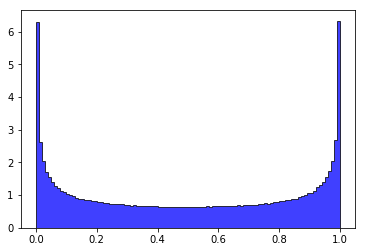

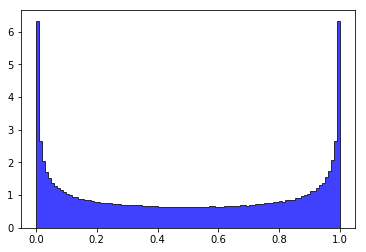

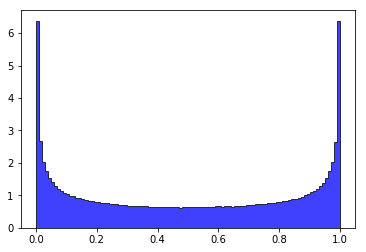

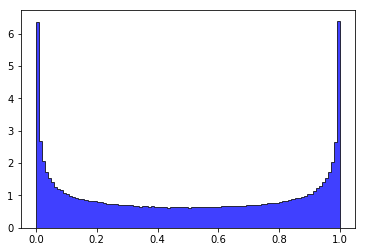

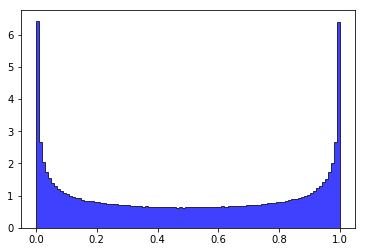

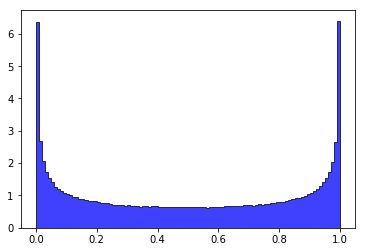

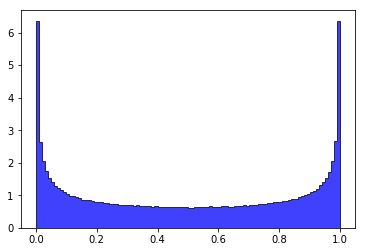

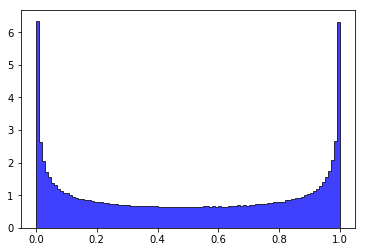

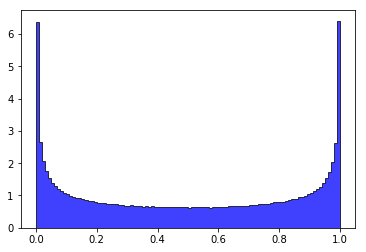

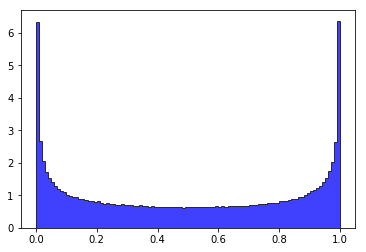

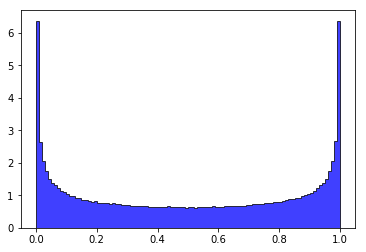

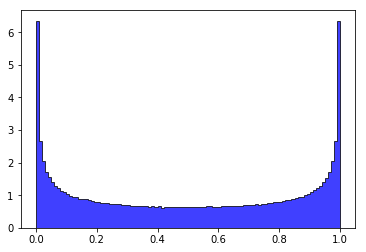

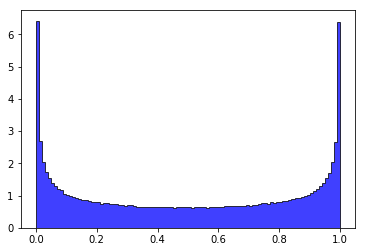

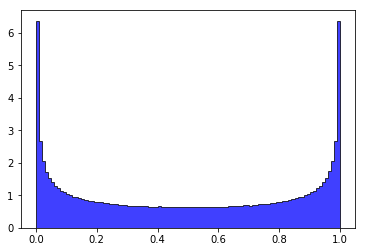

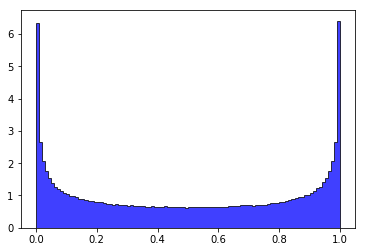

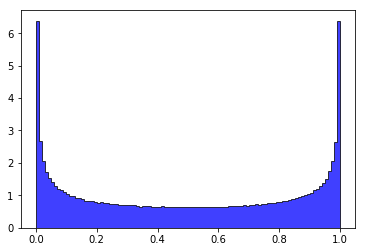

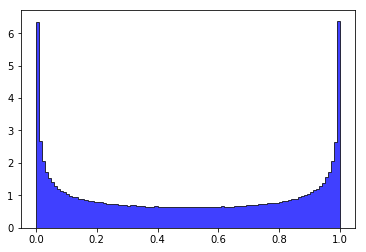

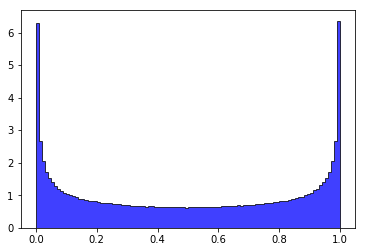

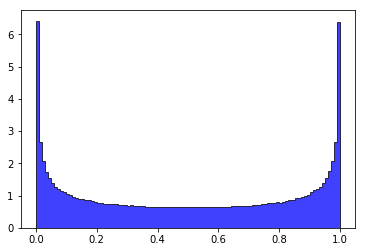

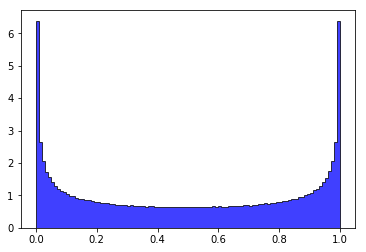

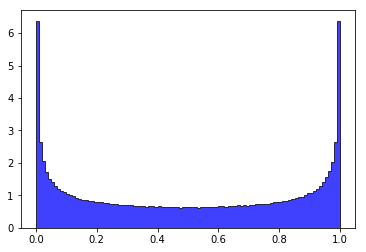

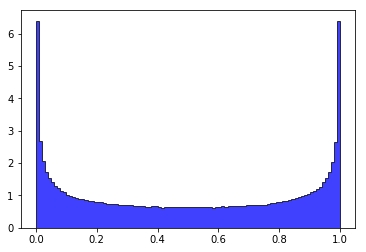

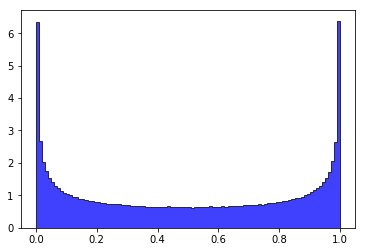

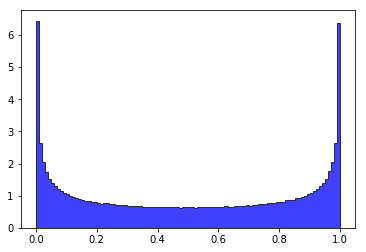

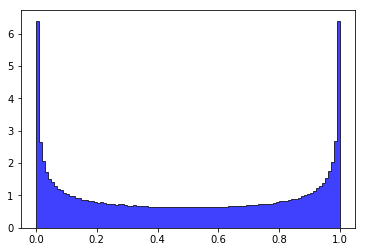

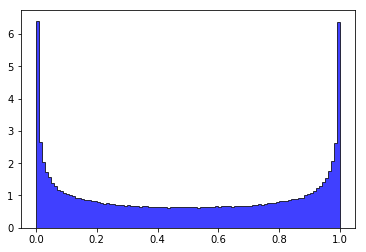

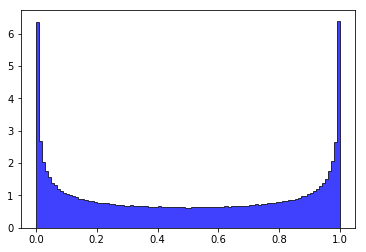

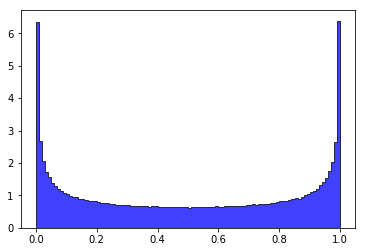

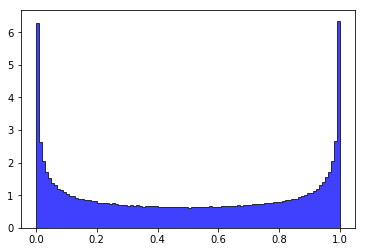

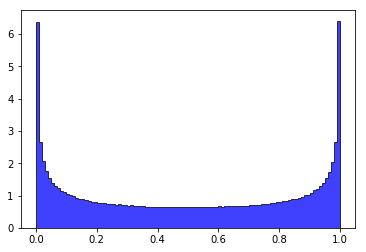

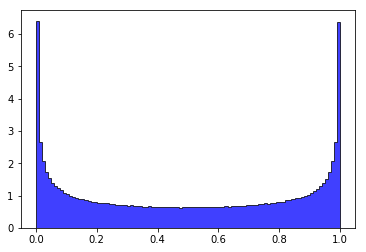

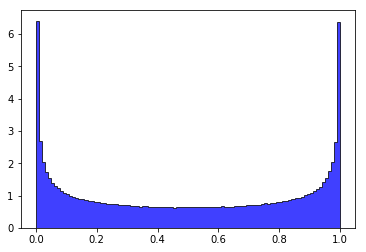

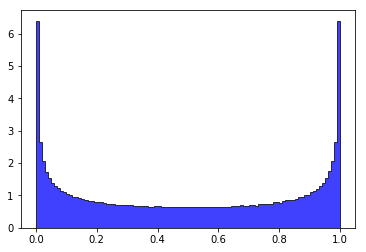

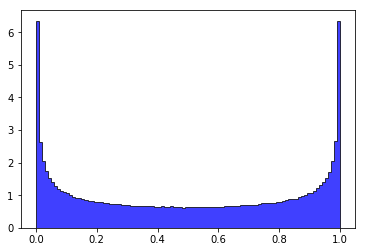

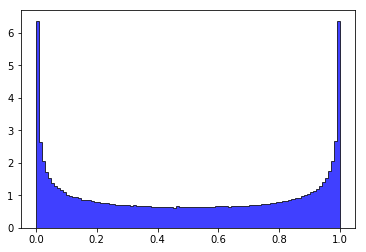

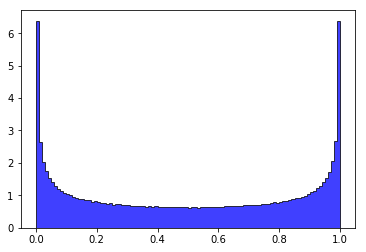

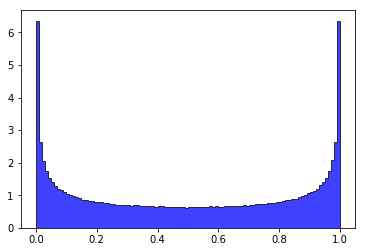

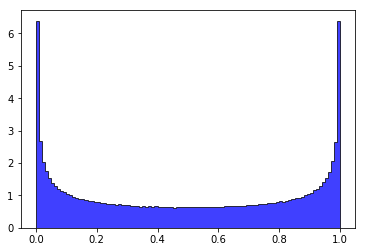

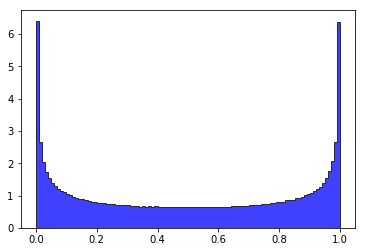

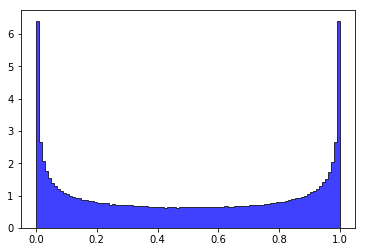

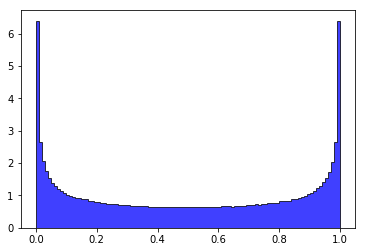

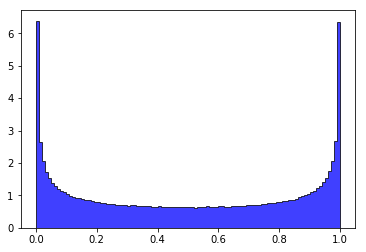

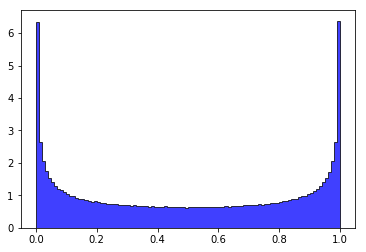

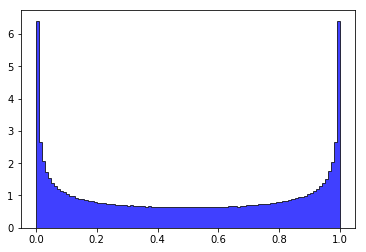

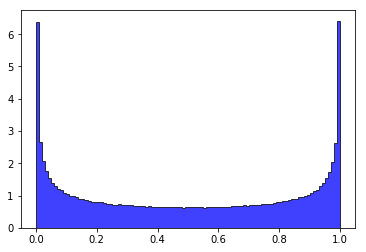

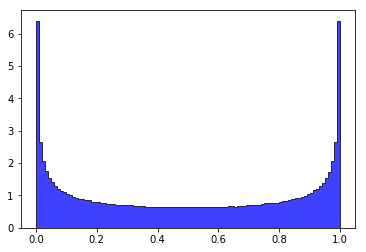

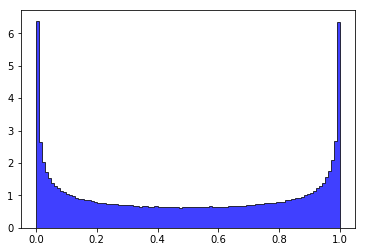

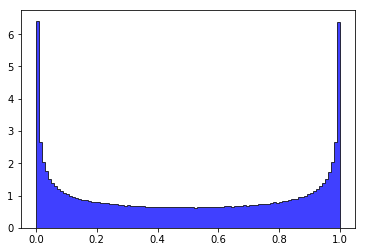

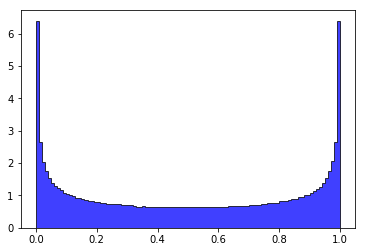

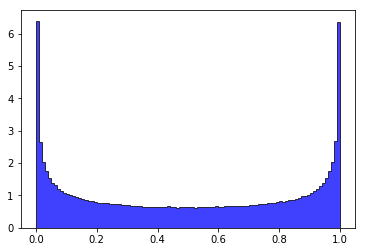

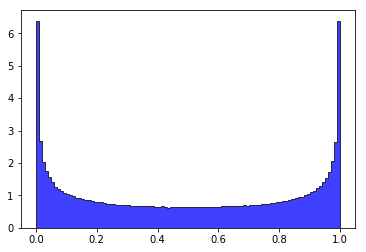

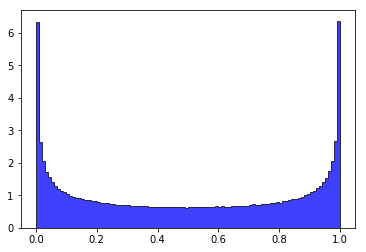

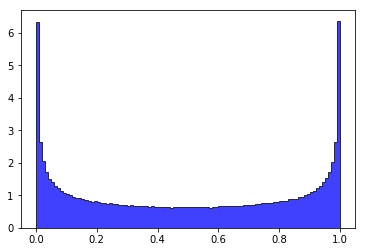

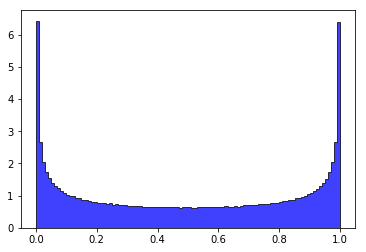

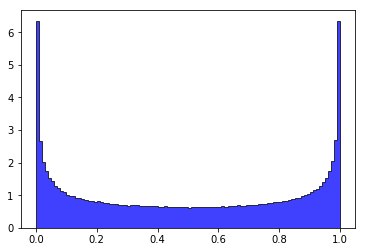

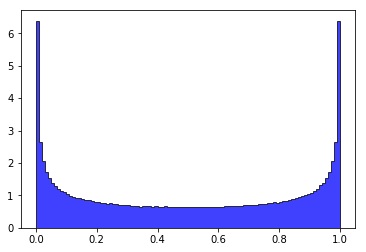

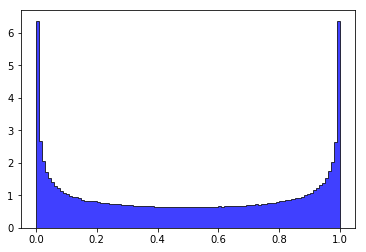

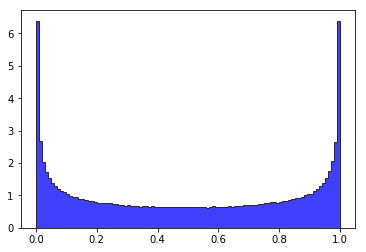

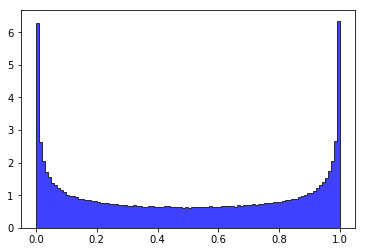

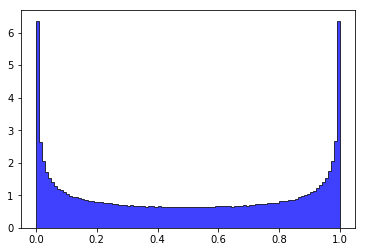

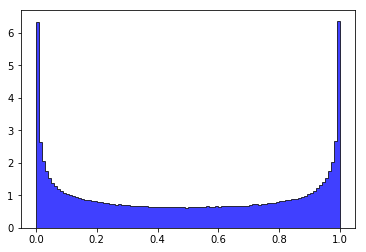

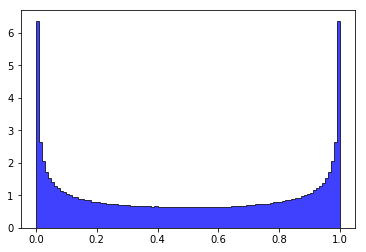

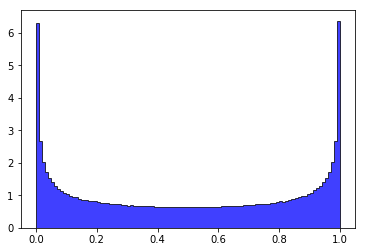

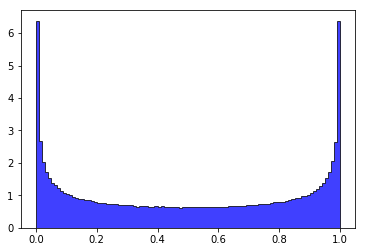

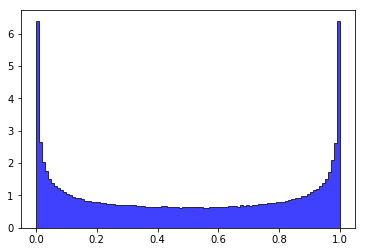

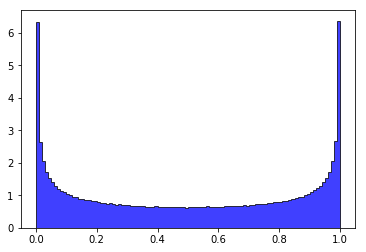

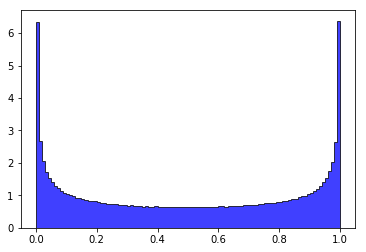

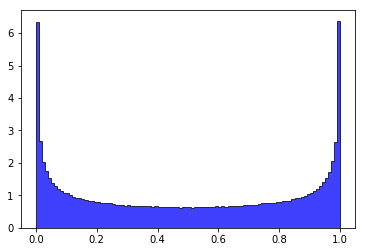

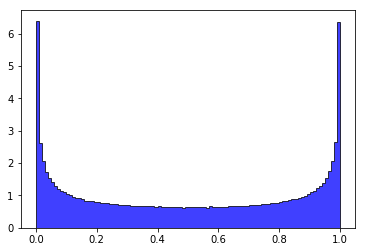

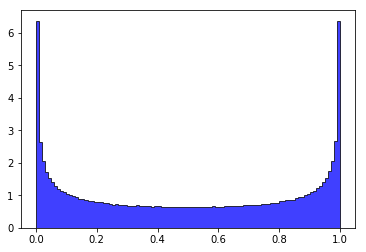

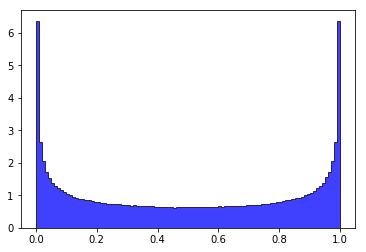

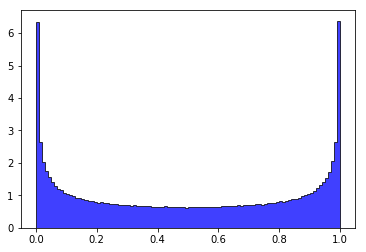

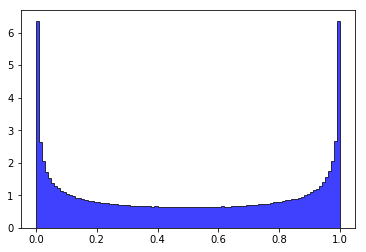

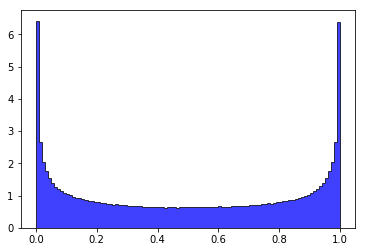

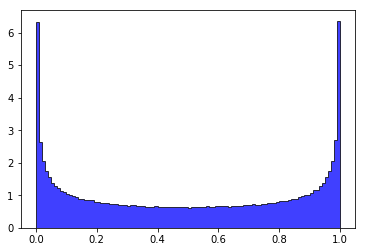

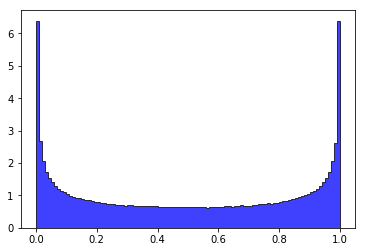

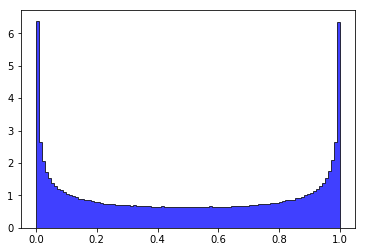

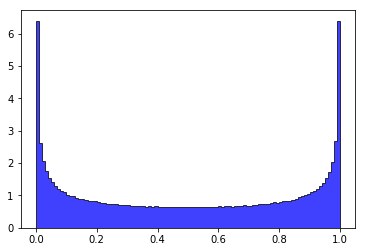

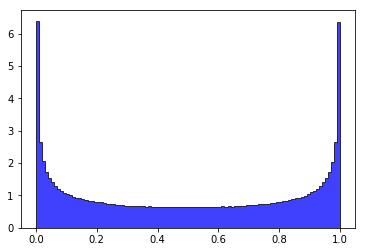

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object)

In [54]:
g= lambda x: 4*x*(1-x)
x0=np.random.uniform(0,1,size=100)
ts_length=1000000
k=100
plot=np.vectorize(plot)
plot(g,x0,ts_length, k)

In [55]:
#Version2
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [56]:
def subplots(fs):

    fig, ax = plt.subplots(figsize=fs)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    return fig, ax

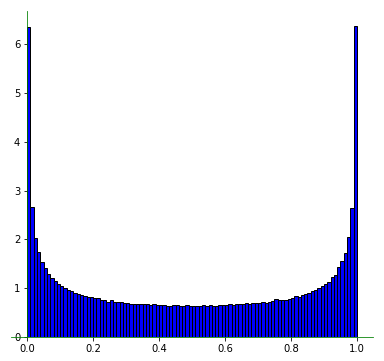

CPU times: user 1.1 s, sys: 16.1 ms, total: 1.11 s
Wall time: 1.14 s


In [57]:
def plotbar(g, xmin, xmax,ts_length, var='x'):
    x0 = np.random.uniform(0,1)
    fig, ax = subplots((6.5,6))
    x = np.empty(ts_length)
    x[0]=x0
    for t in range(ts_length-1):
        x[t+1] = g(x[t])
    ax.hist(x,100,normed=1,facecolor='blue',edgecolor='black')
    plt.show()
xmin, xmax = 0, 1
ts_length = 1000000
g = lambda x: 4 * x * (1 - x)
%time  plotbar(g, xmin, xmax,ts_length)

In [58]:
#Version3

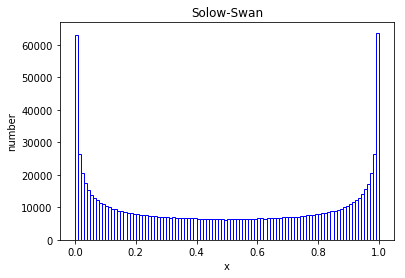

CPU times: user 455 ms, sys: 19.3 ms, total: 475 ms
Wall time: 545 ms


In [59]:
import matplotlib.pyplot as plt
import numpy as np
n = 1000000
x =  np.empty(n)
x[0]=np.random.uniform(0,1)
for t in range(n-1):
    x[t+1] = 4 * x[t] * (1 - x[t])
    
def draw_hist(mylist,Title,Xlabel,Ylabel):
    plt.hist(mylist,100, facecolor='white', edgecolor='blue',alpha=1)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    plt.title(Title)
    plt.show()

%time draw_hist(x, 'Solow-Swan','x','number')